In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных

In [19]:
df = pd.read_csv('manufacturing.csv')

In [20]:
df.head(5)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


## Распределение данных

array([[<Axes: title={'center': 'Temperature (°C)'}>,
        <Axes: title={'center': 'Pressure (kPa)'}>],
       [<Axes: title={'center': 'Temperature x Pressure'}>,
        <Axes: title={'center': 'Material Fusion Metric'}>],
       [<Axes: title={'center': 'Material Transformation Metric'}>,
        <Axes: title={'center': 'Quality Rating'}>]], dtype=object)

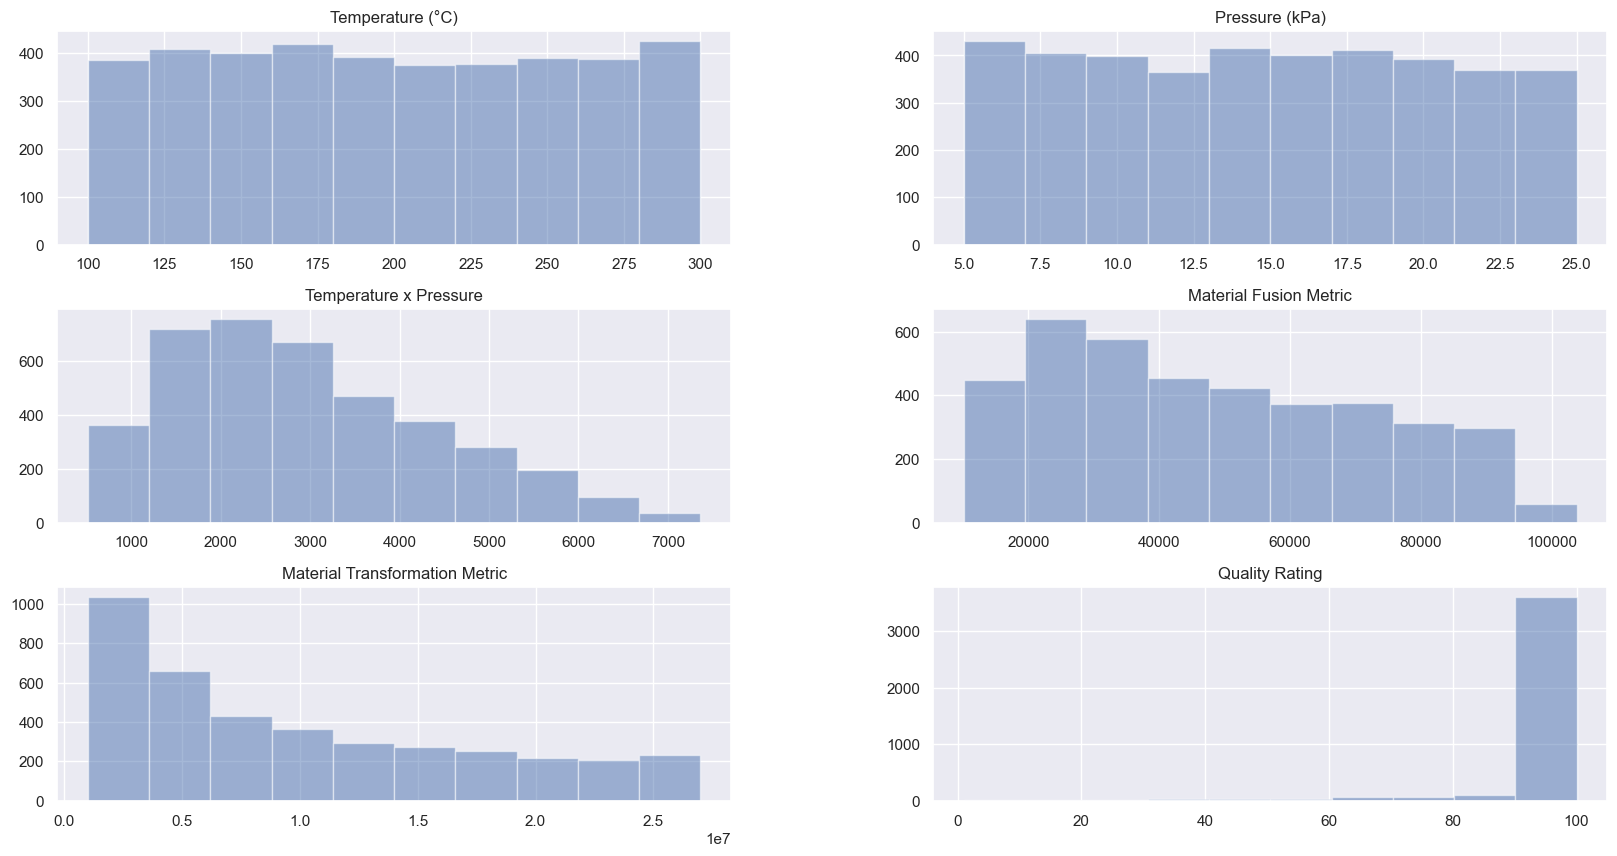

In [22]:
sns.set()
df.hist(alpha=0.5, figsize=(20, 10))

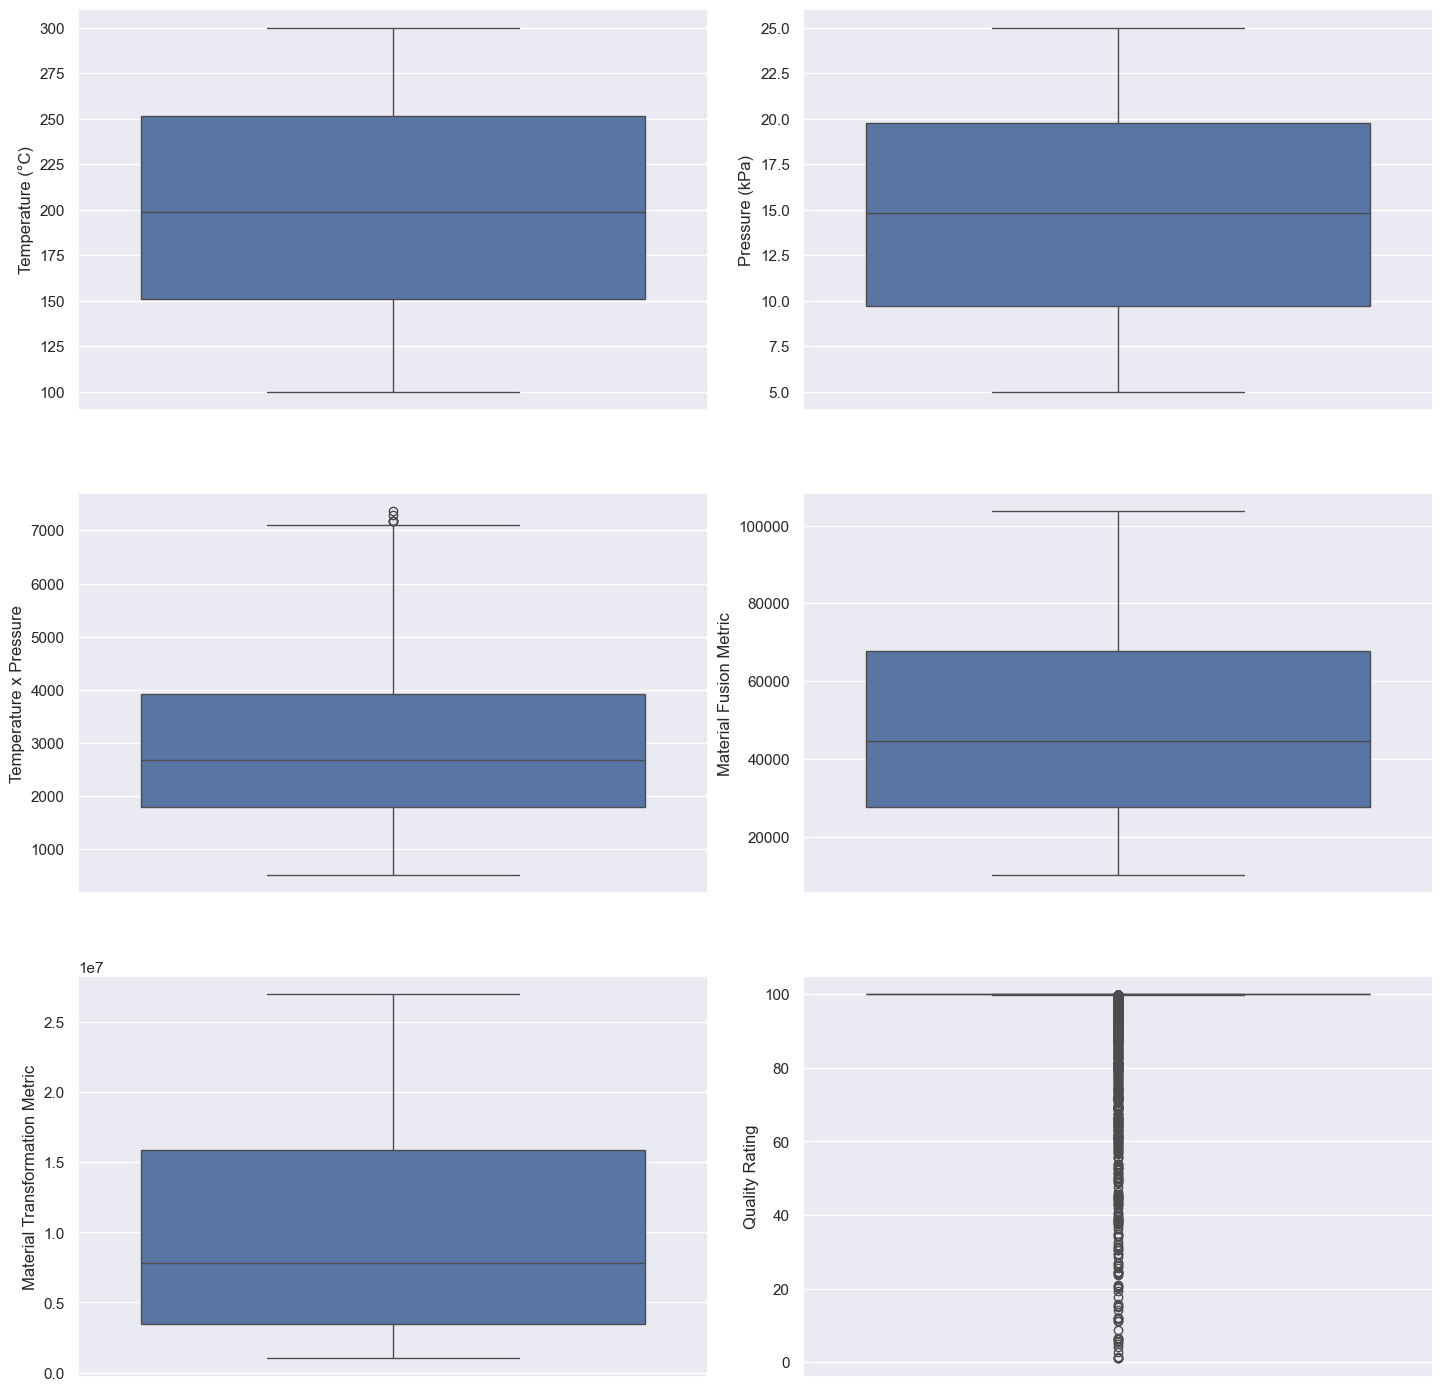

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.tight_layout(pad=3)
for row_index, axis_row in enumerate(axes):
    for ax_index, axis in enumerate(axis_row):
        index = ax_index + row_index * 2
        sns.boxplot(
            data=df,
            y=df[df.columns[index]],
            ax=axis
        )

In [24]:
df.columns = [i.replace(' ', '_').lower().split('_(')[0] for i in df.columns]
df.columns

Index(['temperature', 'pressure', 'temperature_x_pressure',
       'material_fusion_metric', 'material_transformation_metric',
       'quality_rating'],
      dtype='object')

## Baseline

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop('quality_rating', axis=1)
y = df['quality_rating']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)

LinearRegression()

In [29]:
baseline.score(X_test, y_test)

0.506833235848602

In [30]:
transformed_data, best_lambda = boxcox(df['temperature_x_pressure'])
sns.displot(transformed_data, kde=True)

NameError: name 'boxcox' is not defined

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.tight_layout(pad=3)
for row_index, axis_row in enumerate(axes):
    for ax_index, axis in enumerate(axis_row):
        index = ax_index + row_index * 2
        transformed_data, best_lambda = boxcox(df[df.columns[index]])
        sns.histplot(transformed_data, kde=True, ax=axis)

In [ ]:
X = df[df.columns[2:-1]]
X.iloc[:, 0], _ = boxcox(X.iloc[:, 0])
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

In [ ]:
linear_model.score(X_test, y_test)

In [ ]:
for column in X.columns:
    X[column], _ = boxcox(X[column])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

In [ ]:
linear_model.score(X_test, y_test)

In [31]:
df['fusion_x_transformation'] = df['material_fusion_metric'] * df['material_transformation_metric']

In [32]:
df

,temperature,pressure,temperature_x_pressure,material_fusion_metric,material_transformation_metric,quality_rating,fusion_x_transformation
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971,4.109212e+11
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703,9.046862e+11
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758,5.270423e+11
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975,5.213411e+11
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000,2.399740e+11
...,...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000,1.347188e+11
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997,3.075813e+11
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318,8.809405e+11
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975,5.224302e+11


In [33]:
X = df.drop('quality_rating', axis=1)
y = df['quality_rating']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [36]:
linear_model.score(X_test, y_test)

0.7128549919849341

In [37]:
X = X[['temperature', 'pressure', 'material_fusion_metric', 'material_transformation_metric']]

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
X_train, X_test = poly.fit_transform(X_train), poly.fit_transform(X_test)

In [43]:
linear_model_for_poly = LinearRegression()
linear_model_for_poly.fit(X_train, y_train)

LinearRegression()

In [44]:
linear_model_for_poly.score(X_test, y_test)

0.9251200505809767

## Деревья

In [45]:
# !pip install catboost

In [46]:
from catboost import CatBoostRegressor

In [47]:
boost_model = CatBoostRegressor(n_estimators=2000, depth=4)

In [48]:
X = df.drop('quality_rating', axis=1)
y = df['quality_rating']
X = X[['temperature', 'pressure', 'material_fusion_metric', 'material_transformation_metric']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
boost_model.fit(X_train, y_train)

Learning rate set to 0.027186
0:	learn: 12.1920093	total: 152ms	remaining: 5m 2s
1:	learn: 11.9033219	total: 153ms	remaining: 2m 32s
2:	learn: 11.6229179	total: 153ms	remaining: 1m 42s
3:	learn: 11.3389304	total: 154ms	remaining: 1m 16s
4:	learn: 11.0610198	total: 155ms	remaining: 1m 1s
5:	learn: 10.8099747	total: 156ms	remaining: 51.7s
6:	learn: 10.5453896	total: 156ms	remaining: 44.5s
7:	learn: 10.2953526	total: 157ms	remaining: 39.1s
8:	learn: 10.0576415	total: 158ms	remaining: 34.9s
9:	learn: 9.8280047	total: 159ms	remaining: 31.6s
10:	learn: 9.6043694	total: 159ms	remaining: 28.8s
11:	learn: 9.3802862	total: 160ms	remaining: 26.5s
12:	learn: 9.1645426	total: 161ms	remaining: 24.6s
13:	learn: 8.9466697	total: 161ms	remaining: 22.9s
14:	learn: 8.7514793	total: 162ms	remaining: 21.5s
15:	learn: 8.5423088	total: 163ms	remaining: 20.2s
16:	learn: 8.3399348	total: 164ms	remaining: 19.1s
17:	learn: 8.1373903	total: 164ms	remaining: 18.1s
18:	learn: 7.9445090	total: 165ms	remaining: 17.2s

In [50]:
boost_model.score(X_test, y_test)

0.99725620786228

<Axes: >

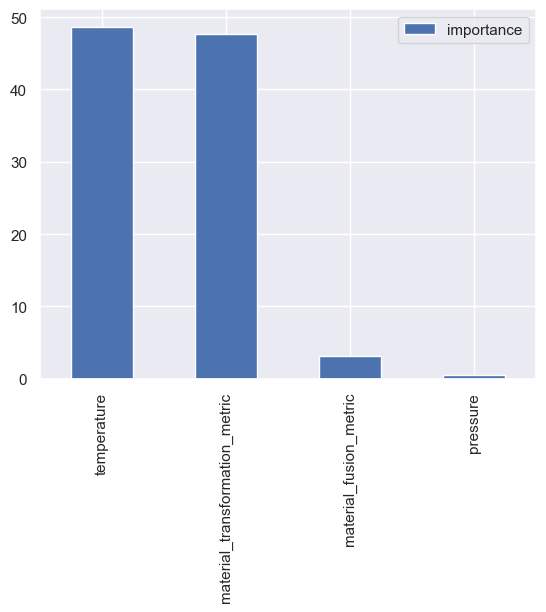

In [58]:
pd.DataFrame(index=X.columns, data=boost_model.feature_importances_, columns=['importance']).sort_values(by='importance', ascending=False).plot.bar()